# <center>First Update on Group Project
# <center>Safe Trade: Stock Prediction
Shofiqur Rahman<br>
Bashir Ahamed<br>
Michelle Uy<br>
Thierno Diallo<br><br>
Grant Long<br>
CSC.59970<br>
November 05, 2018</p>

With a lot of company stocks listed and a huge amount of trading done each working day we have an immense amoount of data at our hand. With that a problem comes is what we consider and what we discard as not necessary. Most importantly, what features do really impact stock prices. The first task is to come up with some features that effects stock prices. For that purpose, we will see correlation between stock price and each features we can find. The data will come from [IEX API](https://iextrading.com/developer/docs/)

Also with all the varieties of stock data at hand we realize that dealing with all the different company stocks together might not give us a woriking model for all company; a model appropriate to predict on one company stocks might not perform equally well on another company. So, initially our foucs is on to build a model that can predict well at least for a company, namely Apple Inc. or AAPL.

We also realize that pridicting an exact stock price depending on some regression model might be too bold. Instead, what we could do is to say, given the present state of the market, if the company stock price is going to rise or fall in near future (Probably, to be specific, in next three/four months). We might add to that by what percent the stock might rise. 

In [1]:
# Import necessary python modules to equip ourself with better tools

# Import library for data manipulation
import pandas as pd
# Import pyhton http library
import requests
# To work with JSON objects returned from http calls
import json


In [2]:
# All API calls to IEX is prefixed with this
iexUrl = 'https://api.iextrading.com/1.0'

# Testing: Making API call to see current price
response = requests.get(iexUrl + '/stock/GOOG/price')
print('API Call Success! \n Google Price: ' + response.text)

API Call Success! 
 Google Price: 1056.53


In [3]:
# Declaring the main dataframe that we will be manipulating throughout the model building
df = pd.DataFrame(columns=['date', 'company', 'symbol', 'dividend', 'eps', 'grossProfit', 'marketcap', 'pe', 'price', 'revenuePerShare'])


In [4]:
### Populating df with data for Apple Inc.
tempdf = pd.DataFrame(columns=['date', 'company', 'symbol', 'dividend', 'eps', 'grossProfit', 'marketcap', 'pe', 'price', 'revenuePerShare'])

# Making API call to get last one year end of day close price(target value) and transaction date for AAPL
response = requests.get(iexUrl + '/stock/aapl/chart/1y')
JSONdata = response.json()
date = list()
price = list()
for data in JSONdata:
    date.append(data['date'])
    price.append(data['close'])
tempdf.date = date
tempdf.price = price
tempdf.company = 'Apple Inc.'
tempdf.symbol = 'AAPL'

In [5]:
# Making API call to get last one year querterly EPS
response = requests.get(iexUrl + '/stock/aapl/earnings')
JSONdata = response.json()
totalEPS = 0 # to set the null EPS later

# Setting EPS values for transaction days that happened after the EPS reporting date
for data in JSONdata['earnings']:
    tempdf.loc[tempdf['date'] > data['EPSReportDate'], ['eps']] = data['actualEPS']
    totalEPS += data['actualEPS']
    
# Setting NaN values in EPS to avarage of last four EPS
tempdf.loc[pd.isna(tempdf['eps']), ['eps']] = totalEPS / len(JSONdata['earnings'])


In [6]:
# Calculating pe
tempdf['pe'] = tempdf['price'] / tempdf['eps']


In [7]:
# Making API call to get last one year querterly dividends
response = requests.get(iexUrl + '/stock/aapl/dividends/1y')
JSONdata = response.json()
totalDividend = 0 # to set the null dividend later

# Setting dividend values for transaction days that happened after the dividend declaredDate
for data in JSONdata:
    tempdf.loc[tempdf['date'] > data['declaredDate'], ['dividend']] = data['amount']
    totalDividend += data['amount']
    
# Setting NaN values in dividend to avarage of last four dividend amount
tempdf.loc[pd.isna(tempdf['dividend']), ['dividend']] = totalDividend / len(JSONdata)


In [8]:
# Making API call to get last one year marketcap and revenuePerShare
response = requests.get(iexUrl + '/stock/aapl/stats')
JSONdata = response.json()

tempdf['marketcap'] = JSONdata['marketcap']
tempdf['revenuePerShare'] = JSONdata['revenuePerShare']


In [9]:
# Making API call to get last one year grossProfit
response = requests.get(iexUrl + '/stock/aapl/financials?period=annual')
JSONdata = response.json()

totalgrossProfit = 0 # to set the null grossProfit later

# Setting grossProfit values for transaction days that happened after the grossProfit report date
for data in JSONdata['financials']:
    tempdf.loc[tempdf['date'] > data['reportDate'], ['grossProfit']] = data['grossProfit']
    totalgrossProfit += data['grossProfit']
    
# Setting NaN values in grossProfit to avarage of last four grossProfit
tempdf.loc[pd.isna(tempdf['grossProfit']), ['grossProfit']] = totalgrossProfit / len(JSONdata['financials'])


In [10]:
# To concate another company with dataframe df
df = pd.concat([df, tempdf], ignore_index=True)
df.head()


,date,company,symbol,dividend,eps,grossProfit,marketcap,pe,price,revenuePerShare
0,2017-10-24,Apple Inc.,AAPL,0.63,2.9675,9.362600e+10,958557627740,52.1516,154.7600,19
1,2017-10-25,Apple Inc.,AAPL,0.63,2.9675,9.362600e+10,958557627740,51.9226,154.0802,19
2,2017-10-26,Apple Inc.,AAPL,0.63,2.9675,9.362600e+10,958557627740,52.2546,155.0654,19
3,2017-10-27,Apple Inc.,AAPL,0.63,2.9675,9.362600e+10,958557627740,54.1268,160.6213,19
4,2017-10-30,Apple Inc.,AAPL,0.63,2.9675,9.362600e+10,958557627740,55.3451,164.2367,19


In [11]:
# Save all stock data in a CSV file called 'StockData.csv'
df.to_csv('StockData.csv')


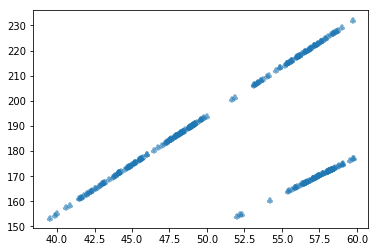

In [15]:
# Visualizig correlation between stock price and pe 
import matplotlib.pyplot as plt

plt.scatter(df.pe, df.price, alpha=0.5, marker=r'$\clubsuit$')
plt.show()


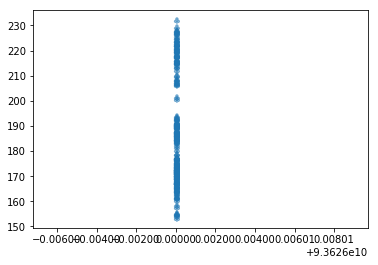

In [18]:
# Visualizig correlation between stock price and pe 
import matplotlib.pyplot as plt

plt.scatter(df.grossProfit, df.price, alpha=0.5, marker=r'$\clubsuit$')
plt.show()

Things to consider: 
    stocks will tend to be correlated with each other